In [12]:
import import_ipynb
from diabetes_data_preprocessing import get_diabetes_dataset

diabetes_data = get_diabetes_dataset()
diabetes_data.info()

importing Jupyter notebook from diabetes_data_preprocessing.ipynb
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------    

In [13]:
diabetes_features = diabetes_data.iloc[:,:8]
diabetes_labels = diabetes_data.iloc[:,-1]

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(\
                                                    diabetes_features,diabetes_labels, \
                                                    test_size=0.2, random_state=11,stratify=diabetes_labels)

In [15]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=500)

lr_clf.fit(X_train,y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

In [16]:
import sys
sys.path.append("..")
from utils import *

get_clf_eval(y_test,pred,pred_proba)

오차 행렬
[[88 12]
 [25 29]]
정확도: 0.7597, 정밀도: 0.7073, 재현율:0.5370    ,F1: 0.6105, AUC: 0.8461,


In [17]:
print(y_train.value_counts())
print(y_test.value_counts())

0    400
1    214
Name: Outcome, dtype: int64
0    100
1     54
Name: Outcome, dtype: int64


#### 0(음성)이 1(양성)보다 2배가까이 많다. 전체 데이터중 65%가 Nagative 이므로 재현율 성능을 올려야 한다.

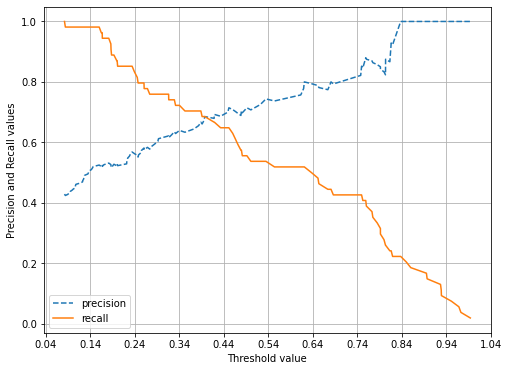

In [18]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np

def precision_recall_curve_plot(y_test,pred_proba):
    precisions, recalls, thresholds = precision_recall_curve(y_test,pred_proba)
    
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary],linestyle='--',label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    
    plt.xlabel("Threshold value");plt.ylabel('Precision and Recall values')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test,pred_proba)

In [21]:
from sklearn.preprocessing import Binarizer

#일반적으로 로지스틱 회귀에서는 피처 스케일링을 적용하는게 좋다.
binarizer = Binarizer(threshold=0.34)
pred_th_034 = binarizer.fit_transform(pred_proba.reshape(-1,1))

get_clf_eval(y_test,pred_th_034,pred_proba)

오차 행렬
[[78 22]
 [15 39]]
정확도: 0.7597, 정밀도: 0.6393, 재현율:0.7222    ,F1: 0.6783, AUC: 0.8461,


#### 임곗값을 0.5 에서 0.34 로 변경해 재현율을 증가시켰다.

<AxesSubplot:>

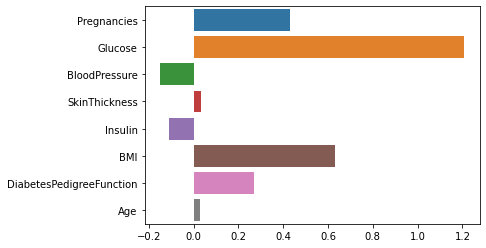

In [30]:
import seaborn as sns

lr_clf.coef_[0]
sns.barplot(x=lr_clf.coef_[0],y=X_train.columns)

#### 피처별 중요도를 시각화 했다